In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#GoogleColab
#from google.colab import files

#MachineLearning
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
#uploaded = files.upload()
#prop = pd.read_csv("")

In [3]:
 prop = pd.read_csv(r"C:\Users\santi\OneDrive\Escritorio\Santi Documentos Viejo\Facultad UTN\5° Año\Ciencia de datos\Data sets\dataset_properati_caba.csv",delimiter=',')

In [4]:
prop.head()

,id,created_on,operation,property_type,neighbourhood,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses
0,1649a3c35359d681abae4a63d9a8545054d2096b,2017-09-22,sell,house,Palermo Viejo,-34.588953,-58.429882,2000000.0,312.0,NaN,NaN,NaN,NaN
1,1ab035ccbe77702987c3f09850d12c634e612aa2,2017-09-01,sell,PH,Parque Chacabuco,-34.635866,-58.431048,131500.0,80.0,50.0,NaN,3.0,NaN
2,90fc7c61b6fbc6ef99368a21cd9ac0d30d54c697,2017-09-01,sell,apartment,Barracas,-34.644924,-58.371919,140000.0,125.0,85.0,NaN,NaN,NaN
3,c195e8f3a596ab49b95d699c07e1a04be503ba68,2017-09-01,sell,apartment,Recoleta,-34.596511,-58.385747,109000.0,45.0,45.0,2.0,2.0,3350.0
4,f891875ff44e6f99e30e101b3901d1e7510ef41b,2017-09-01,sell,apartment,Parque Patricios,-34.639173,-58.417069,94000.0,38.0,38.0,NaN,NaN,NaN


In [5]:
prop.shape

(25319, 13)

In [6]:
prop.operation.unique()

array(['sell'], dtype=object)

In [7]:
prop.isnull().sum()

id                           0
created_on                   0
operation                    0
property_type                0
neighbourhood                0
lat                       1048
lon                       1048
price                     1928
surface_total_in_m2       3323
surface_covered_in_m2     2529
floor                    22093
rooms                     6607
expenses                 20289
dtype: int64

In [8]:
total = prop.isnull().sum().sort_values(ascending=False)
porcentaje = (prop.isnull().sum()/prop.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])
missing_data

,Total,Porcentaje
floor,22093,0.872586
expenses,20289,0.801335
rooms,6607,0.260950
surface_total_in_m2,3323,0.131245
surface_covered_in_m2,2529,0.099885
price,1928,0.076148
lat,1048,0.041392
lon,1048,0.041392
id,0,0.000000
created_on,0,0.000000


In [9]:
prop = prop[prop['price'].notna()]

In [10]:
prop.shape

(23391, 13)

In [11]:
prop.isnull().sum()

id                           0
created_on                   0
operation                    0
property_type                0
neighbourhood                0
lat                        946
lon                        946
price                        0
surface_total_in_m2       2252
surface_covered_in_m2     1484
floor                    20267
rooms                     5408
expenses                 18477
dtype: int64

In [12]:
prop.describe()

,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses
count,22445.000000,22445.000000,2.339100e+04,21139.000000,21907.000000,3124.000000,17983.000000,4914.000000
mean,-34.596604,-58.459926,3.795836e+05,134.762761,116.203268,10.341869,2.900906,4480.657102
std,0.238875,0.388389,6.740833e+05,1652.989255,1360.581258,50.385434,1.777550,6690.418046
min,-38.416097,-68.466206,1.111100e+04,0.000000,1.000000,1.000000,1.000000,1.000000
25%,-34.618937,-58.463871,1.210000e+05,45.000000,41.000000,2.000000,2.000000,1500.000000
50%,-34.600678,-58.434186,1.870000e+05,70.000000,62.000000,4.000000,3.000000,2800.000000
75%,-34.582460,-58.400716,3.450000e+05,121.000000,107.000000,7.000000,4.000000,5000.000000
max,-26.861151,-58.353227,1.725144e+07,184000.000000,150000.000000,904.000000,38.000000,184361.000000


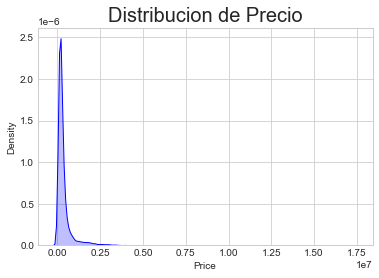

In [13]:
#Plot Precio
sns.kdeplot(prop.price, color="b", shade = True)
plt.xlabel("Price")
plt.title('Distribucion de Precio',size = 20)
plt.show()


In [14]:
price_quantile95 = prop.price.quantile(0.95)
prop = prop.loc[(prop.price < price_quantile95)]


 mu = 258970.41 and sigma = 229743.69



C:\Users\santi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price distribution')

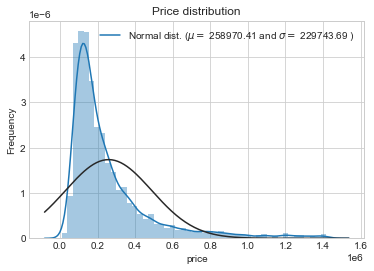

In [15]:
sns.distplot(prop['price'] , fit=norm)
(mu, sigma) = norm.fit(prop['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

In [16]:
prop.property_type.value_counts()

apartment    17903
house         1713
PH            1647
store          957
Name: property_type, dtype: int64

In [17]:
prop.neighbourhood.value_counts()

Palermo            1960
Belgrano           1813
Caballito          1689
Recoleta           1441
Villa Crespo        896
                   ... 
Villa Real           27
Palermo Viejo        25
Villa Soldati        21
Catalinas             3
Villa Riachuelo       3
Name: neighbourhood, Length: 62, dtype: int64

In [18]:
top5_neigh = ["Palermo", "Belgrano", "Caballito", "Recoleta", "Villa Crespo"]
prop_top_neigh = prop[prop["neighbourhood"].isin(top5_neigh)]
#prop_top_neigh.head(10)


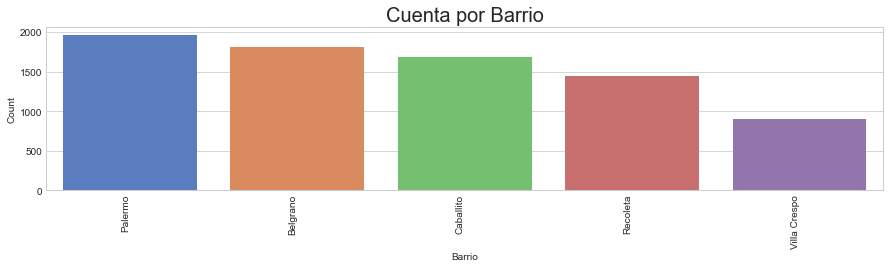

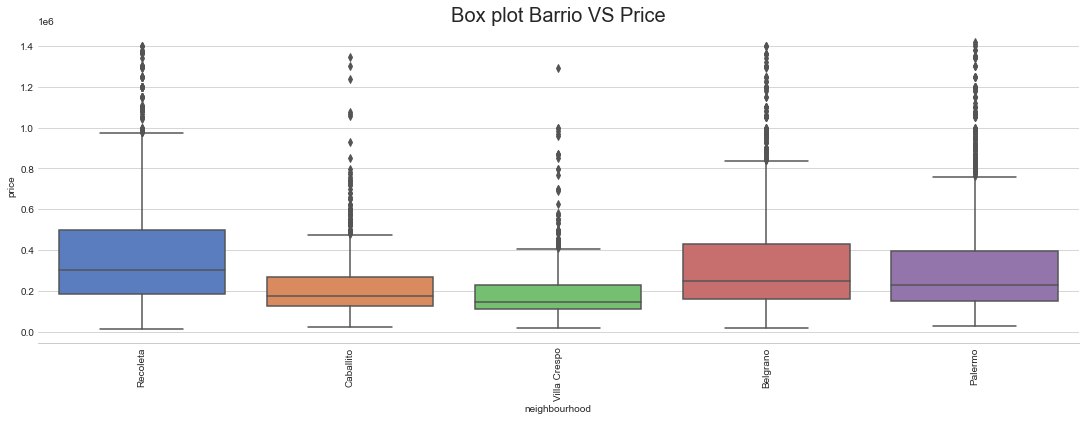

In [19]:

plt.figure(figsize=(15,3))
g = sns.countplot(x='neighbourhood',data=prop, palette = "muted",order=top5_neigh)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cuenta por Barrio',size = 20)
plt.xlabel("Barrio")
plt.ylabel("Count")
plt.show()

g = sns.catplot(x="neighbourhood",y='price',data=prop_top_neigh, kind="box", height = 5,aspect=3 ,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("price")
plt.title('Box plot Barrio VS Price',size = 20)
plt.show()

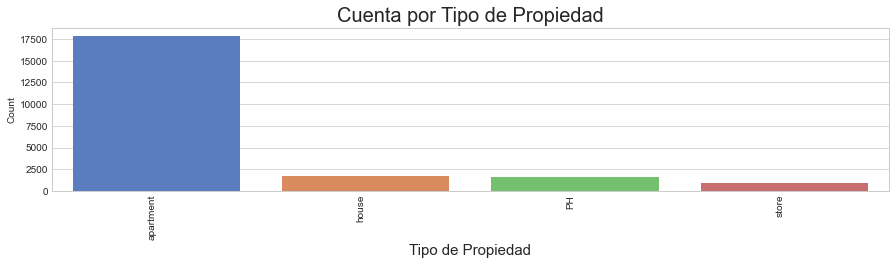

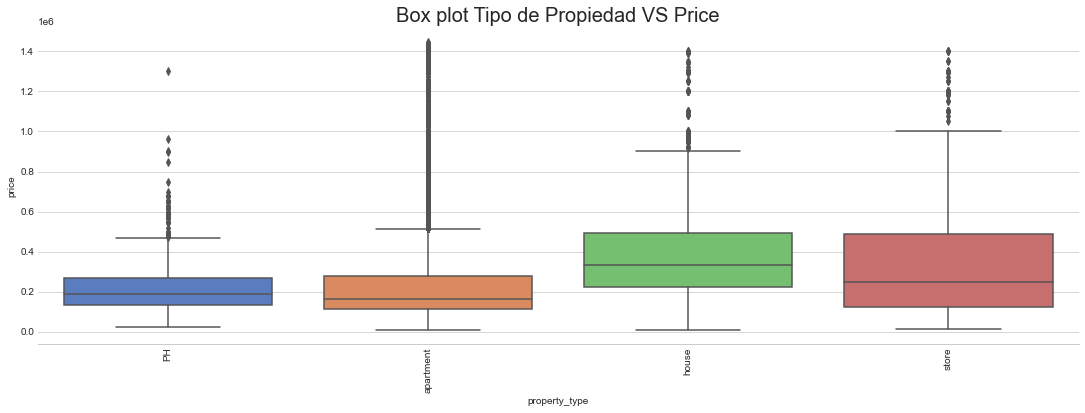

In [20]:
property = prop['property_type'].value_counts().index[0:10]

plt.figure(figsize=(15,3))
g = sns.countplot(x='property_type',data=prop, palette = "muted",order=property)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cuenta por Tipo de Propiedad',size = 20)
plt.xlabel("Tipo de Propiedad", size = 15)
plt.ylabel("Count")
plt.show()




g = sns.catplot(x="property_type",y='price',data=prop, kind="box", height = 5,aspect=3 ,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("price")
plt.title('Box plot Tipo de Propiedad VS Price',size = 20)
plt.show()

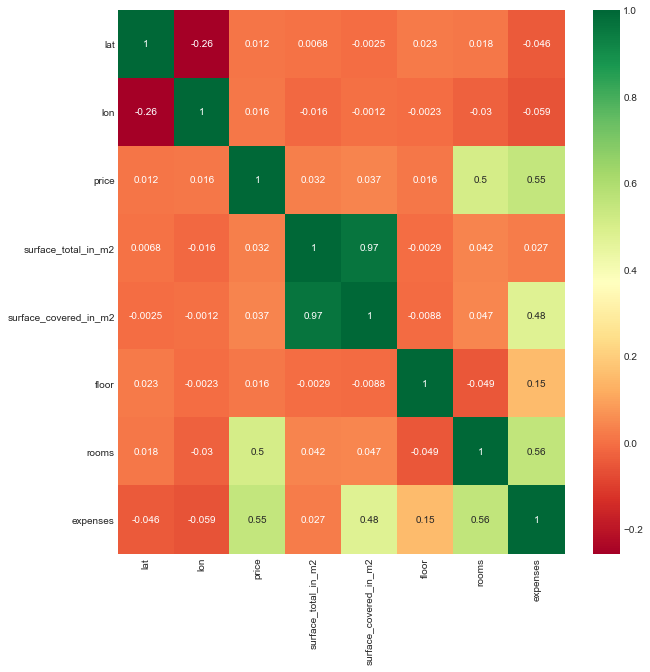

In [21]:
corrmat = prop.corr()
plt.figure(figsize=(10,10))
g = sns.heatmap(prop.corr(),annot=True,cmap="RdYlGn")

In [22]:
prop['surface_total_in_m2'].fillna(prop['surface_total_in_m2'].mean(), inplace = True)
prop['surface_covered_in_m2'].fillna(prop['surface_covered_in_m2'].mean(), inplace = True)
prop['rooms'].fillna(prop['rooms'].median(), inplace = True)
prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22220 entries, 1 to 25318
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     22220 non-null  object 
 1   created_on             22220 non-null  object 
 2   operation              22220 non-null  object 
 3   property_type          22220 non-null  object 
 4   neighbourhood          22220 non-null  object 
 5   lat                    21288 non-null  float64
 6   lon                    21288 non-null  float64
 7   price                  22220 non-null  float64
 8   surface_total_in_m2    22220 non-null  float64
 9   surface_covered_in_m2  22220 non-null  float64
 10  floor                  3053 non-null   float64
 11  rooms                  22220 non-null  float64
 12  expenses               4834 non-null   float64
dtypes: float64(8), object(5)
memory usage: 2.9+ MB


In [23]:
prop.loc[(prop['expenses'].isnull()) & (prop["property_type"]=="house"), "expenses"] = 0
prop['expenses'].fillna(prop['expenses'].mean(), inplace = True)

In [24]:
prop.head()

,id,created_on,operation,property_type,neighbourhood,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses
1,1ab035ccbe77702987c3f09850d12c634e612aa2,2017-09-01,sell,PH,Parque Chacabuco,-34.635866,-58.431048,131500.0,80.0,50.0,NaN,3.0,3089.672395
2,90fc7c61b6fbc6ef99368a21cd9ac0d30d54c697,2017-09-01,sell,apartment,Barracas,-34.644924,-58.371919,140000.0,125.0,85.0,NaN,3.0,3089.672395
3,c195e8f3a596ab49b95d699c07e1a04be503ba68,2017-09-01,sell,apartment,Recoleta,-34.596511,-58.385747,109000.0,45.0,45.0,2.0,2.0,3350.000000
4,f891875ff44e6f99e30e101b3901d1e7510ef41b,2017-09-01,sell,apartment,Parque Patricios,-34.639173,-58.417069,94000.0,38.0,38.0,NaN,3.0,3089.672395
5,8bffade33a2412d614e82cc3d828175f63443549,2017-09-01,sell,apartment,Flores,-34.639497,-58.531714,160000.0,76.0,76.0,13.0,3.0,6700.000000


In [25]:
prop = prop.drop(['id', 'created_on', 'operation', 'lat', 'lon', 'floor'], axis=1)

In [26]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22220 entries, 1 to 25318
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          22220 non-null  object 
 1   neighbourhood          22220 non-null  object 
 2   price                  22220 non-null  float64
 3   surface_total_in_m2    22220 non-null  float64
 4   surface_covered_in_m2  22220 non-null  float64
 5   rooms                  22220 non-null  float64
 6   expenses               22220 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.9+ MB


In [27]:
prop.head()

,property_type,neighbourhood,price,surface_total_in_m2,surface_covered_in_m2,rooms,expenses
1,PH,Parque Chacabuco,131500.0,80.0,50.0,3.0,3089.672395
2,apartment,Barracas,140000.0,125.0,85.0,3.0,3089.672395
3,apartment,Recoleta,109000.0,45.0,45.0,2.0,3350.000000
4,apartment,Parque Patricios,94000.0,38.0,38.0,3.0,3089.672395
5,apartment,Flores,160000.0,76.0,76.0,3.0,6700.000000


In [28]:
prop.head()

,property_type,neighbourhood,price,surface_total_in_m2,surface_covered_in_m2,rooms,expenses
1,PH,Parque Chacabuco,131500.0,80.0,50.0,3.0,3089.672395
2,apartment,Barracas,140000.0,125.0,85.0,3.0,3089.672395
3,apartment,Recoleta,109000.0,45.0,45.0,2.0,3350.000000
4,apartment,Parque Patricios,94000.0,38.0,38.0,3.0,3089.672395
5,apartment,Flores,160000.0,76.0,76.0,3.0,6700.000000


In [29]:
y = np.array(prop[["price"]])

In [30]:
x = prop.drop(['price'], axis=1)

In [31]:
x.head()

,property_type,neighbourhood,surface_total_in_m2,surface_covered_in_m2,rooms,expenses
1,PH,Parque Chacabuco,80.0,50.0,3.0,3089.672395
2,apartment,Barracas,125.0,85.0,3.0,3089.672395
3,apartment,Recoleta,45.0,45.0,2.0,3350.000000
4,apartment,Parque Patricios,38.0,38.0,3.0,3089.672395
5,apartment,Flores,76.0,76.0,3.0,6700.000000


In [32]:
x = pd.get_dummies(data=x, columns=['property_type','neighbourhood'])

In [33]:
x.shape

(22220, 70)

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)

In [35]:
scaler = preprocessing.StandardScaler().fit(xtrain)
xtrain_scal = scaler.transform(xtrain)
xtest_scal = scaler.transform(xtest)

# KNN Regressor

In [40]:
knn = KNeighborsRegressor(weights = "distance")
parameters_k = np.arange(20,41,5)
parameters_knn = [{'n_neighbors': parameters_k}]
regressor_knn = GridSearchCV(knn, parameters_knn, refit = True, cv=5, verbose=True)

In [41]:
regressor_knn.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([20, 25, 30, 35, 40])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [42]:
regressor_knn.best_params_

{'n_neighbors': 20}

In [43]:
regressor_knn.best_score_

0.6829511854185839

In [44]:
ypred2 = regressor_knn.predict(xtest_scal)

In [45]:
np.sqrt(mean_squared_error(ytest, ypred2))

129393.57078276796


# Support Vector Regressor

In [46]:
svreg = SVR()

In [47]:
param_svreg = {'kernel':('linear', 'rbf'), 'C':[1, 10 ], 'gamma':[ 0.1,1]}

In [48]:
regressor_svr = GridSearchCV(svreg, param_svreg, cv=3, verbose=True)

In [49]:
regressor_svr.fit(xtrain_scal, ytrain.ravel())

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  9.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'gamma': [0.1, 1],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [50]:
regressor_svr.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}

In [51]:
regressor_svr.best_score_

0.13824642762513153

In [52]:
ypred3 = regressor_svr.predict(xtest_scal)
ypred3

array([130007.43338409, 232789.94896776, 282448.90492659, ...,
       173900.71016727, 229359.02808701, 219819.82290384])

In [53]:
np.sqrt(mean_squared_error(ytest, ypred3))

203034.7603454303

# RandomForest Regressor

In [54]:
rf= RandomForestRegressor()

In [55]:
param_trees = {'n_estimators': [50, 200], 
               'max_features': [0.5, 'sqrt','log2'],  
               'min_samples_leaf':[1, 5]}

In [56]:
regressor_rf = GridSearchCV(rf, param_grid = param_trees, refit = True, cv = 3)
regressor_rf.fit(xtrain, ytrain.ravel())

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [57]:
regressor_rf.best_params_


{'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 200}

In [58]:
regressor_rf.best_score_

0.7512334896253208

In [59]:
ypred4 = regressor_rf.predict(xtest_scal)
ypred4

array([ 85725.40166667,  95229.2       ,  96199.195     , ...,
       106003.74333333, 104454.84166667, 111647.175     ])

In [60]:
np.sqrt(mean_squared_error(ytest, ypred4))

263244.20927040663